<a href="https://colab.research.google.com/github/Arunimad/tradedata_forecasting/blob/main/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

I just took the small portion of the beans dataset to check...
Only the first pair....

In [131]:
interests = ['Year', 'Trade Quantity']

df=pd.read_csv('https://raw.githubusercontent.com/Arunimad/tradedata_forecasting/main/beanscheck.csv', usecols=interests)
df.head()


,Year,Trade Quantity
0,1997,172.0
1,1998,575.0
2,1999,3.0
3,2000,452.0
4,2001,538.0


The following date format alteration is helpful for it be used like a time-series

In [132]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.head()

,Trade Quantity
Year,
1997-01-01,172.0
1998-01-01,575.0
1999-01-01,3.0
2000-01-01,452.0
2001-01-01,538.0


<Axes: xlabel='Year'>

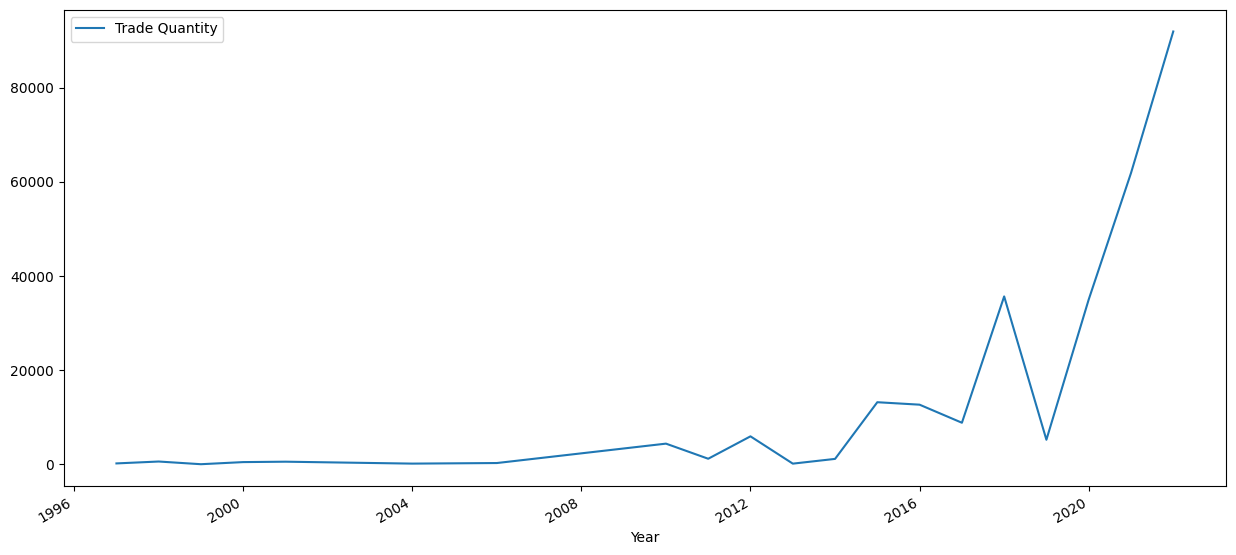

In [133]:
df.head()
df.describe()


from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

Just checking part

----------------------------

It has to have p value greater thatn 0.05, meanign that its non-stationary. For us to proceed with the ARIMA model


In [84]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Trade Quantity'])

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Trade Quantity'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 0.1571457153151566
p-value : 0.9697529686583022
#Lags Used : 8
Number of Observations : 11


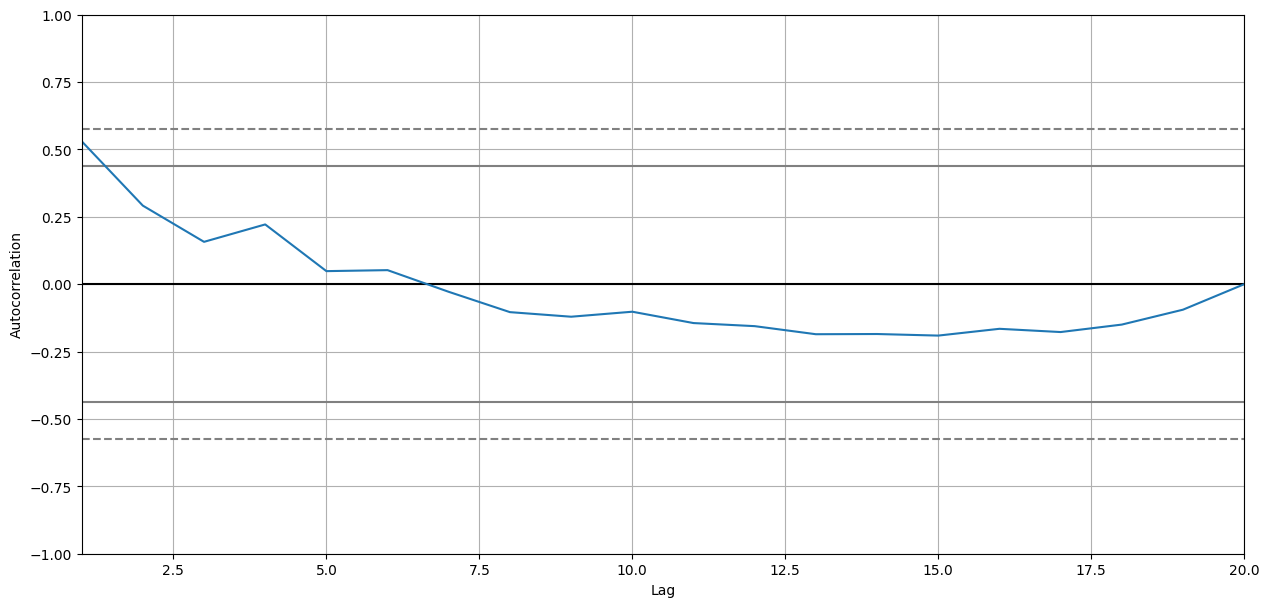

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Trade Quantity'])
plt.show()

p,d,q are the hyperparameters for the ARIMA model
I am going for 1,1,1 as a test case check
We need to find the optimal one

In [86]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Trade Quantity'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Trade Quantity   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -209.901
Date:                Wed, 10 Jul 2024   AIC                            425.802
Time:                        23:46:53   BIC                            428.635
Sample:                             0   HQIC                           426.281
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9250      0.840     -1.101      0.271      -2.571       0.721
ma.L1          0.8305      0.977      0.850      0.395      -1.085       2.746
sigma2      2.917e+08   6.56e-09   4.45e+16      0.000    2.92e+08    2.92e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.82   Prob(JB):                         0.83
Heteroskedasticity (H):            4400.64   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.76e+32. Standard errors may be unstable.
"""

Here is the line of interest....
The number of steps you give here, will fetch the future years as many as you like......

In [87]:
forecast = model_fit.get_forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model evaluation

Just evaluation part...
It doesnt seem to be great atm.....

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

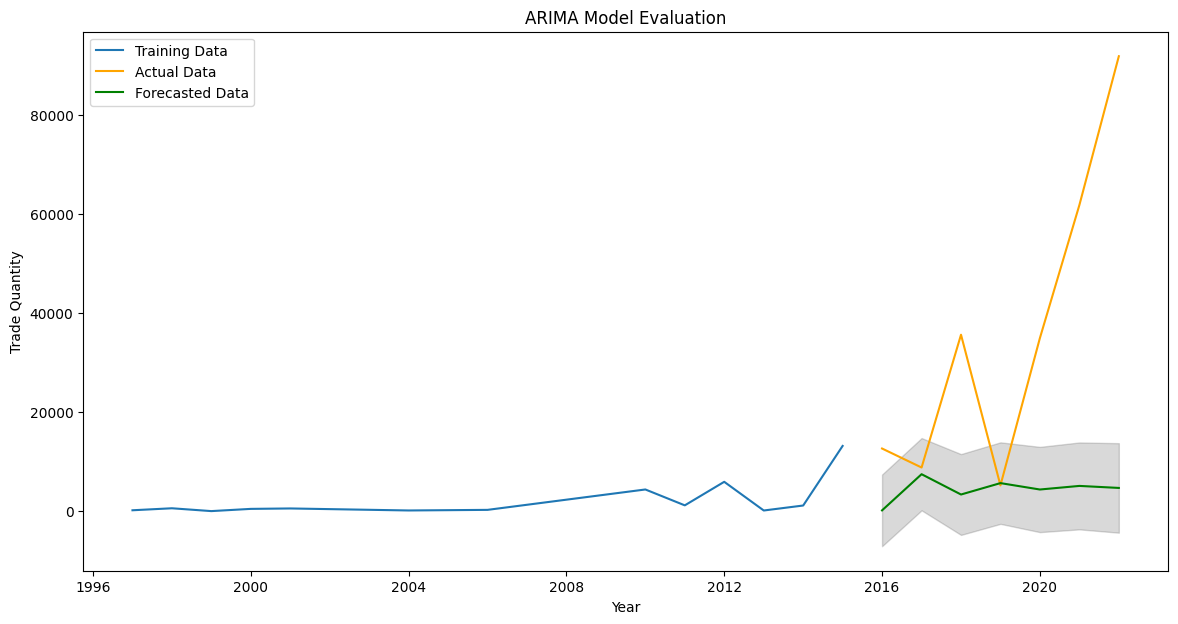

RMSE: 43051.681855765106


In [128]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(df) * 0.65)
train, test = df[0:train_size], df[train_size:len(df)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Trade Quantity'], order=(1, 1, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean.to_list(), index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['Trade Quantity'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['Trade Quantity'], label='Training Data')
plt.plot(test['Trade Quantity'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('Trade Quantity')
plt.legend()
plt.show()

print('RMSE:', rmse)

Trying Auto-ARIMA for better hyperparameters while fitting ...

In [135]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=238.544, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=238.786, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=241.672, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=237.302, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.533 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


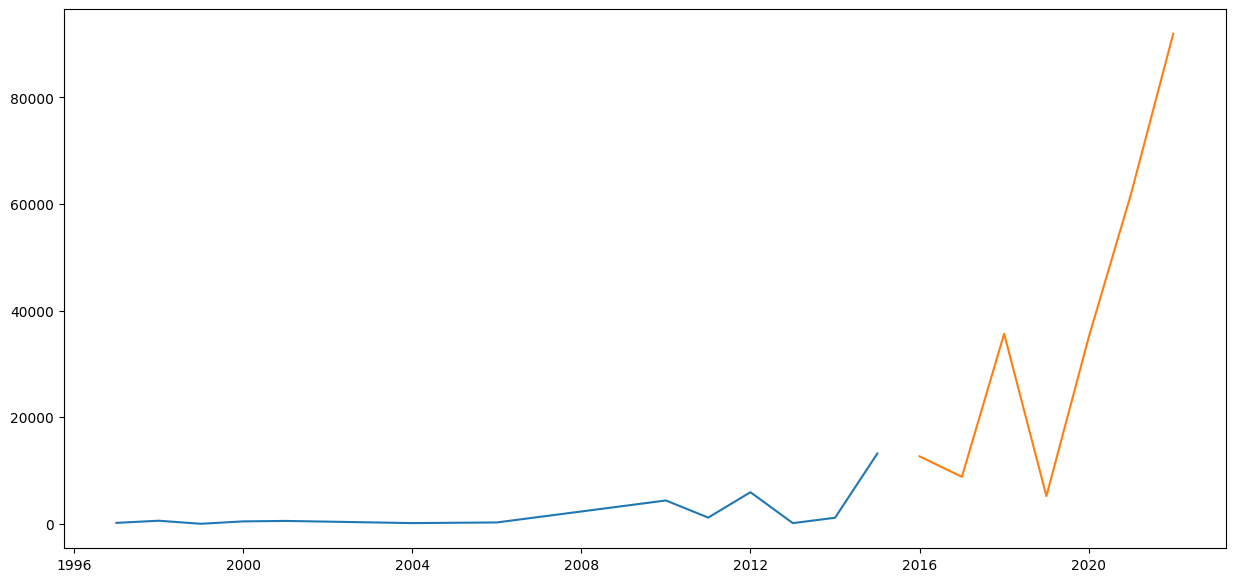

In [138]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Trade Quantity'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

It again kindof looks the same fo this dataset.

Your predictions from the auto-ARIMA model will be from the following line



In [140]:
forecast = model.predict(n_periods=10)
forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


13    13173.54
14    13173.54
15    13173.54
16    13173.54
17    13173.54
18    13173.54
19    13173.54
20    13173.54
21    13173.54
22    13173.54
dtype: float64

If we are using this
(Lets make sure the model is trained on both train and test and then we predict 10 or x year ahead. Currently in the last sections I only used train...)